This notebook uses the readskills dataset by Strobl from the R party package.
  
The notebooks shows how different variable importance measures can provide different results.

In [1]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/Users/rajiv.shah/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
##Loading Strobl reading scores data
print('Loading data...')
# load or create your dataset
df = pd.read_csv('readingskills.csv', sep=',')
y = df['score']
X = df.drop('score', axis=1)
##Convert categorical to 0 and 1
X['nativeSpeaker']  = X['nativeSpeaker'].apply(lambda x: 0 if x.strip()=='no' else 1)

Loading data...


In [3]:
X.head()

,nativeSpeaker,age,milk_consumption
0,1,5,24.831889
1,1,6,25.952378
2,0,11,30.421700
3,1,7,28.664501
4,1,11,31.882070


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20,random_state=42)


In [7]:
gbm = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.005,
                        objective = 'regression_l2',
                        n_estimators=2000)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=20)

[1]	valid_0's l1: 6.73514	valid_0's l2: 65.2715
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l1: 6.70119	valid_0's l2: 64.6691
[3]	valid_0's l1: 6.66741	valid_0's l2: 64.073
[4]	valid_0's l1: 6.63379	valid_0's l2: 63.483
[5]	valid_0's l1: 6.60243	valid_0's l2: 62.9282
[6]	valid_0's l1: 6.56915	valid_0's l2: 62.3498
[7]	valid_0's l1: 6.53811	valid_0's l2: 61.8061
[8]	valid_0's l1: 6.50516	valid_0's l2: 61.2391
[9]	valid_0's l1: 6.47444	valid_0's l2: 60.7063
[10]	valid_0's l1: 6.44181	valid_0's l2: 60.1505
[11]	valid_0's l1: 6.40935	valid_0's l2: 59.6004
[12]	valid_0's l1: 6.37911	valid_0's l2: 59.0836
[13]	valid_0's l1: 6.34697	valid_0's l2: 58.5443
[14]	valid_0's l1: 6.31704	valid_0's l2: 58.0378
[15]	valid_0's l1: 6.28522	valid_0's l2: 57.5092
[16]	valid_0's l1: 6.2556	valid_0's l2: 57.0129
[17]	valid_0's l1: 6.22409	valid_0's l2: 56.4947
[18]	valid_0's l1: 6.19477	valid_0's l2: 56.0083
[19]	valid_0's l1: 6.16358	valid_0's l2: 55.5003
[20]	valid_0's l1: 

[408]	valid_0's l1: 1.32728	valid_0's l2: 3.3411
[409]	valid_0's l1: 1.3242	valid_0's l2: 3.32595
[410]	valid_0's l1: 1.3212	valid_0's l2: 3.31399
[411]	valid_0's l1: 1.31814	valid_0's l2: 3.29914
[412]	valid_0's l1: 1.3151	valid_0's l2: 3.28447
[413]	valid_0's l1: 1.31215	valid_0's l2: 3.27288
[414]	valid_0's l1: 1.30913	valid_0's l2: 3.25849
[415]	valid_0's l1: 1.30613	valid_0's l2: 3.24426
[416]	valid_0's l1: 1.30323	valid_0's l2: 3.23303
[417]	valid_0's l1: 1.30025	valid_0's l2: 3.21909
[418]	valid_0's l1: 1.2973	valid_0's l2: 3.20531
[419]	valid_0's l1: 1.29444	valid_0's l2: 3.19442
[420]	valid_0's l1: 1.29151	valid_0's l2: 3.18091
[421]	valid_0's l1: 1.28859	valid_0's l2: 3.16756
[422]	valid_0's l1: 1.28578	valid_0's l2: 3.15702
[423]	valid_0's l1: 1.28289	valid_0's l2: 3.14393
[424]	valid_0's l1: 1.28002	valid_0's l2: 3.13099
[425]	valid_0's l1: 1.27725	valid_0's l2: 3.12077
[426]	valid_0's l1: 1.2744	valid_0's l2: 3.10809
[427]	valid_0's l1: 1.27157	valid_0's l2: 3.09556
[428]	

[983]	valid_0's l1: 0.840426	valid_0's l2: 1.50887
[984]	valid_0's l1: 0.840289	valid_0's l2: 1.50901
[985]	valid_0's l1: 0.840121	valid_0's l2: 1.50827
[986]	valid_0's l1: 0.840078	valid_0's l2: 1.50767
[987]	valid_0's l1: 0.839759	valid_0's l2: 1.50787
[988]	valid_0's l1: 0.839465	valid_0's l2: 1.50696
[989]	valid_0's l1: 0.839189	valid_0's l2: 1.50605
[990]	valid_0's l1: 0.839019	valid_0's l2: 1.50634
[991]	valid_0's l1: 0.839015	valid_0's l2: 1.50575
[992]	valid_0's l1: 0.838882	valid_0's l2: 1.50589
[993]	valid_0's l1: 0.838725	valid_0's l2: 1.50518
[994]	valid_0's l1: 0.838441	valid_0's l2: 1.50429
[995]	valid_0's l1: 0.83828	valid_0's l2: 1.5045
[996]	valid_0's l1: 0.837997	valid_0's l2: 1.50361
[997]	valid_0's l1: 0.837995	valid_0's l2: 1.50304
[998]	valid_0's l1: 0.837869	valid_0's l2: 1.50334
[999]	valid_0's l1: 0.837588	valid_0's l2: 1.50246
[1000]	valid_0's l1: 0.837457	valid_0's l2: 1.50261
[1001]	valid_0's l1: 0.837277	valid_0's l2: 1.50191
[1002]	valid_0's l1: 0.836998	v

[1361]	valid_0's l1: 0.796927	valid_0's l2: 1.44438
[1362]	valid_0's l1: 0.796903	valid_0's l2: 1.44474
[1363]	valid_0's l1: 0.796872	valid_0's l2: 1.44442
[1364]	valid_0's l1: 0.796745	valid_0's l2: 1.4441
[1365]	valid_0's l1: 0.796771	valid_0's l2: 1.44447
[1366]	valid_0's l1: 0.79674	valid_0's l2: 1.44415
[1367]	valid_0's l1: 0.796772	valid_0's l2: 1.44452
[1368]	valid_0's l1: 0.796798	valid_0's l2: 1.44488
[1369]	valid_0's l1: 0.796767	valid_0's l2: 1.44456
[1370]	valid_0's l1: 0.796641	valid_0's l2: 1.44424
[1371]	valid_0's l1: 0.796672	valid_0's l2: 1.44461
[1372]	valid_0's l1: 0.796699	valid_0's l2: 1.44497
[1373]	valid_0's l1: 0.796667	valid_0's l2: 1.44465
[1374]	valid_0's l1: 0.796573	valid_0's l2: 1.44418
[1375]	valid_0's l1: 0.796605	valid_0's l2: 1.44455
[1376]	valid_0's l1: 0.796614	valid_0's l2: 1.44487
[1377]	valid_0's l1: 0.796583	valid_0's l2: 1.44456
[1378]	valid_0's l1: 0.796614	valid_0's l2: 1.44492
[1379]	valid_0's l1: 0.79652	valid_0's l2: 1.44445
[1380]	valid_0'

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.005, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=2000, n_jobs=-1, num_leaves=31,
       objective='regression_l2', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#ax = lgb.plot_metric(evals_result, metric='rmse')
#plt.show()

Plotting feature importances...


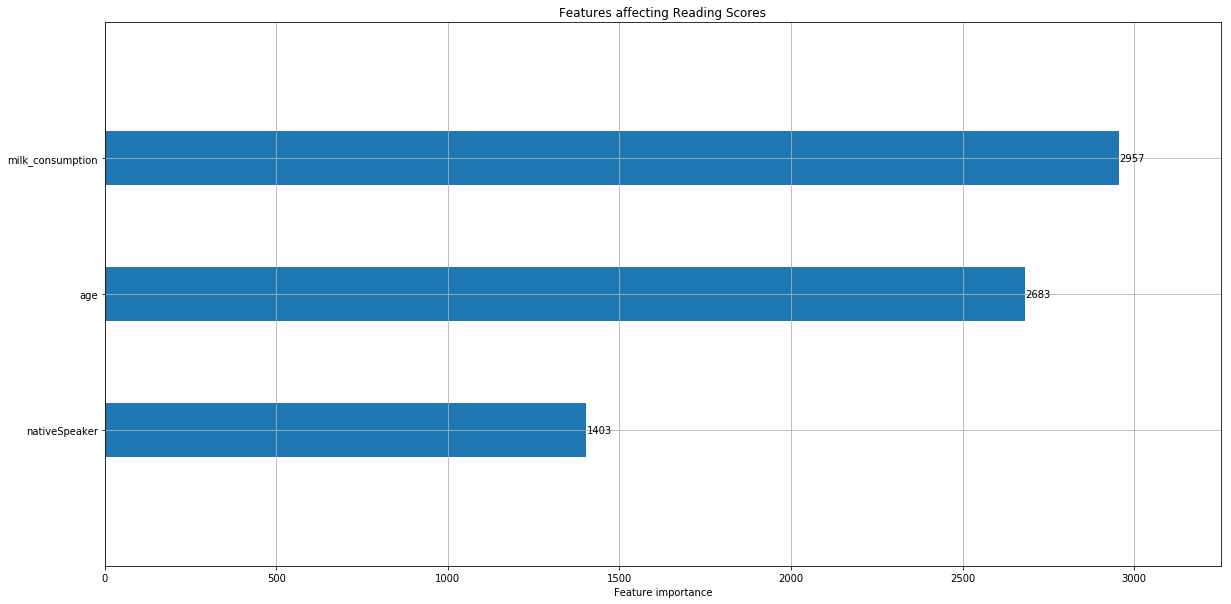

In [8]:
print('Plotting feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=10,height=.4,title="Features affecting Reading Scores",figsize=(20,10),ylabel=None)
plt.show()

In [9]:
##Get Feature importance
import numpy as np
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(gbm, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
1.3775 ± 0.1271,age
0.2430 ± 0.0231,nativeSpeaker
0.0221 ± 0.0031,milk_consumption


In [10]:
perm = PermutationImportance(gbm, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
1.4140 ± 0.5027,age
0.2812 ± 0.0967,nativeSpeaker
0.0158 ± 0.0070,milk_consumption
